## DSCI 552 : HomeWork 2: Linear Regression

### Name: Jayantraj CS (USC ID: 3993-1362-35)

In [114]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances
import random
import math

In [115]:
random.seed(1234)

## *Question 1.a) Download the Combined Cycle Power Plant data*

In [116]:
# Downloading the Data

df = pd.read_excel('../Data/CCPP/Folds5x2_pp.xlsx')

In [117]:
# We have downloaded the data.
# Let us perform the description statistics to understand the dataset.

# Displays the first 4 rows of the dataset.

df.head(4)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48


In [118]:
# Displays the last 4 rows of the dataset.

df.tail(4)

,AT,V,AP,RH,PE
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [119]:
# checking whether we have any missing values in the dataset. Luckily, we dont have any!

df.isna().any()

AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool

## *Question 1.b)  i.) How many rows are in this data set? How many columns? What do the rows and columns represent?*

In [120]:
# Dimensions of the dataset.
# The dataset consists of 9568 rows and 5 columns.

df.shape

(9568, 5)

In [121]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

From the Descriptive statistics and the shape of the data, we can understand that,

the Combined cycle power plant data has 9568 rows and five columns or attributes.

The rows are the data points collected from a Combined Cycle Power Plant over 6 years (2006-2011).

The columns represent the following:
    
<br>1.AT (temperature : celcius)                                     -> float64
<br>2.V  (Exhaust Vacuum : Centimeters of mercury (cm Hg))           -> float64
<br>3.AP (Ambient Pressure : milibar)                                -> float64
<br>4.RH (Relative Humidity : % percentage)                          -> float64
<br>5.PE (Net hourly Electrical Energy Output : Mega watt(MW))       -> float64


<br>Out of which the first 4 attributes numbered from 1 to 4 are called as independent variables
<br>or predictors and the last variable is called the dependent variable or response.

## *Question 1.b)  ii.) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.*

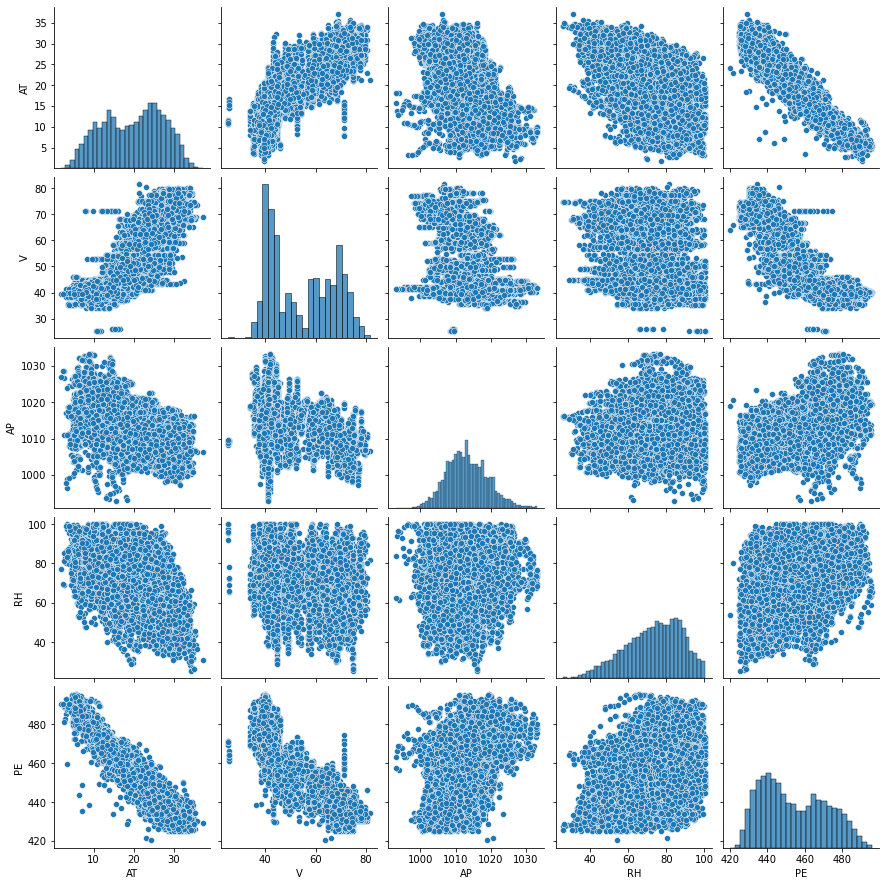

In [122]:
# Plotting the scatter plot.

plot = sns.pairplot(df)
plt.show()

From the Scatter plots we can observe that:

<br>1. Only Ambient pressure variable (AP) almost shows normal distribution.
<br>2. Strong negative correaltion between Temperature (AT) and response variable PE. (reason: negative slope)
<br>3. Strong negative correaltion between Exhaust vacuum (V) and response variable PE. (reason: negative slope)
<br>4. Positive correlation between Ambient Pressure (AP) and response variable PE. (reason: positive slope)
<br>5. Positive correlation between Relative Humidity (RH) and response variable PE. (reason: positive slope)


## *Question 1.b)  iii.) What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table*

In [123]:
# Describing the Dataset.

df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [124]:
# Summarizing the data

summary = df.describe().T

#InterQuartile Range is the first quartile subtracted from the third quartile.

summary['InterQuartileRange'] = summary['75%']-summary['25%']

summary['Range'] = summary['max']-summary['min']
summary['median']=summary['50%']
summary['FirstQuartile']=summary['25%']
summary['ThirdQuartile']=summary['75%']

summary = summary[['mean','median','Range','FirstQuartile','ThirdQuartile','InterQuartileRange']]
summary.T

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
FirstQuartile,13.510000,41.740000,1009.100000,63.327500,439.750000
ThirdQuartile,25.720000,66.540000,1017.260000,84.830000,468.430000
InterQuartileRange,12.210000,24.800000,8.160000,21.502500,28.680000


## *Question 1.c)  For each predictor, fit a simple linear regression model to predict the response. Describe your results.                                                                                                         In which of the models is there a statistically significant association between the predictor and the response?                                                                                                                               Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?*

In [125]:
# Before Starting the Simple Linear Regression, let us put the data into training set.

def get_train_test_data(df):
    return df['AT'].to_numpy(),df['V'].to_numpy(),df['AP'].to_numpy(),df['RH'].to_numpy(),df['PE'].to_numpy()
    

In [126]:
train_x_AT,train_x_V,train_x_AP,train_x_RH,train_y = get_train_test_data(df)

### *We are using the The Bonferroni Outlier Tests to determine the outliers.*
### *The Bonferroni outlier test uses a t distribution to test whether the model's largest studentized residual value's outlier status is statistically different from the other observations in the model.*

In [127]:
def Linear_Regression(train_x,train_y):
    
    train_x_ = sm.add_constant(train_x,prepend=False)
    model = sm.OLS(train_y,train_x_)
    results = model.fit()
    # setting p_value to be 0.05
    p_value = 0.05
    
    # Value is stored in the form of b0,b1.
    #print(results.summary())
    #print(results.params)
    #print(train_x)
    #print(results.outlier_test())
    outliers = results.outlier_test()
    outliers_index = np.where(outliers[:, 2] < p_value)
    
    return train_x_,results,outliers,outliers_index

In [128]:
# Function to plot the graphs.

def plot_graph(train_x,train_x_,train_y,outliers,outliers_index,results,predictor):
    #print(train_x)
    #print(train_y)
    #print(train_x_)
    
    #print(results.predict(train_x_))
    
    fig, axes = plt.subplots(figsize=(14, 7))
    with plt.style.context('ggplot'):
        # alpha -> 0 is transparent and 1 is opaque
        axes.scatter(train_x, train_y,c='green',alpha=0.4, label="Observations")
        axes.scatter(train_x[outliers_index], train_y[outliers_index],c='red',alpha=1,marker="*", label="Outliers")
        
        axes.plot(train_x, results.predict(train_x_), c='black', alpha=0.8, label="Regression Line")
    axes.set_ylabel("PE")
    axes.set_xlabel(predictor)
    axes.legend()
    plt.show()
    
    
    
    
    

In [129]:
def print_data(train_x_AT,train_x_,train_y,outliers,outliers_index,results,predictor):
    
    print("\n\nSUMMARY")
    print(results.summary())
    plot_graph(train_x_AT,train_x_,train_y,outliers,outliers_index,results,predictor)
 
    outliers_dataframe = np.vstack((train_x_AT[outliers_index], train_y[outliers_index])).T
    temp = pd.DataFrame(outliers_dataframe, columns=[predictor, "PE"])
    print(temp)
    print("Total number of outliers = ",len(temp))
    

## *Simple Linear Regression between AT and PE*

In [130]:
simple_linear_regression_parameters = {}

Linear Regression with AT(temperature)


SUMMARY
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:39:01   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1 

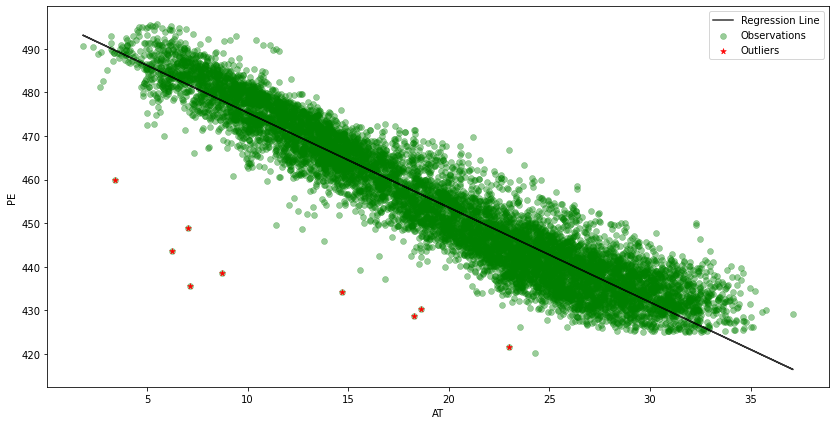

      AT      PE
0   8.74  438.63
1   6.22  443.73
2  14.69  434.12
3  23.00  421.57
4  18.60  430.38
5   7.06  448.97
6   7.14  435.58
7  18.26  428.67
8   3.40  459.86
Total number of outliers =  9


In [131]:
train_x_,results,outliers,outliers_index = Linear_Regression(train_x_AT,train_y)

print("Linear Regression with AT(temperature)")

predictor ="AT"

print_data(train_x_AT,train_x_,train_y,outliers,outliers_index,results,predictor)

simple_linear_regression_parameters['AT']=results.params[0]

We know that the P-value tests the null hypothesis that the coefficient is equal to 0 (no effect). A low p-value (in our case <0.05) that we can reject the null hypothesis. 

Here, the p-value =0 (we can see from the summary). Hence, the feature or predictor (AT) is a meaningful addition to our model.


## *Simple Linear Regression between V and PE*

Linear Regression with Exhaust vacuum (V)


SUMMARY
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:39:24   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


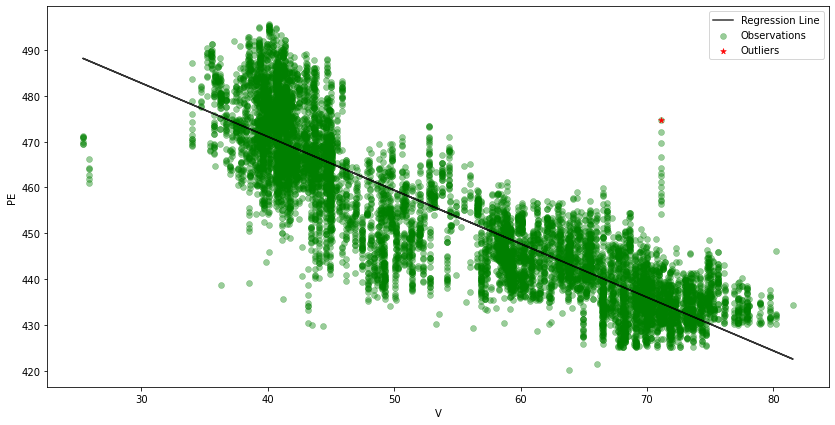

       V      PE
0  71.14  474.66
Total number of outliers =  1


In [132]:
train_x_,results,outliers,outliers_index = Linear_Regression(train_x_V,train_y)

print("Linear Regression with Exhaust vacuum (V)")

predictor ="V"

print_data(train_x_V,train_x_,train_y,outliers,outliers_index,results,predictor)

simple_linear_regression_parameters['V']=results.params[0]

We know that the P-value tests the null hypothesis that the coefficient is equal to 0 (no effect). A low p-value (in our case <0.05) that we can reject the null hypothesis. 

Here, the p-value =0 (we can see from the summary). Hence, the feature or predictor (V) is a meaningful addition to our model.

## *Simple Linear Regression between AP and PE*

Linear Regression with AP (Ambient Pressure)


SUMMARY
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:39:41   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

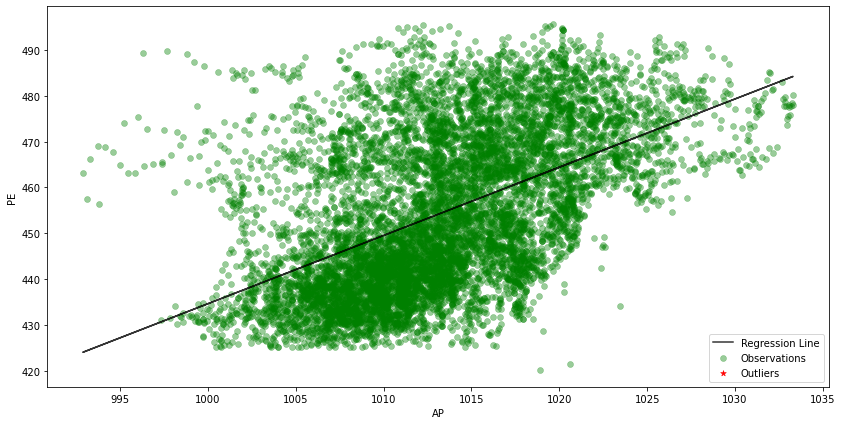

Empty DataFrame
Columns: [AP, PE]
Index: []
Total number of outliers =  0


In [133]:
train_x_,results,outliers,outliers_index = Linear_Regression(train_x_AP,train_y)

print("Linear Regression with AP (Ambient Pressure)")

predictor ="AP"

print_data(train_x_AP,train_x_,train_y,outliers,outliers_index,results,predictor)

simple_linear_regression_parameters['AP']=results.params[0]

We know that the P-value tests the null hypothesis that the coefficient is equal to 0 (no effect). A low p-value (in our case <0.05) that we can reject the null hypothesis. 

Here, the p-value =0 (we can see from the summary). Hence, the feature or predictor (AP) is a meaningful addition to our model.

## *Simple Linear Regression between RH and PE*

Linear Regression with RH (Relative Hummidity)


SUMMARY
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:39:59   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

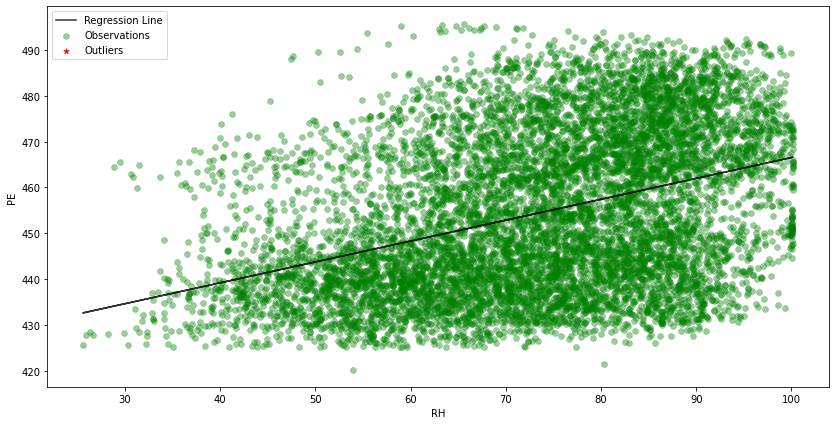

Empty DataFrame
Columns: [RH, PE]
Index: []
Total number of outliers =  0


In [134]:
train_x_,results,outliers,outliers_index = Linear_Regression(train_x_RH,train_y)

print("Linear Regression with RH (Relative Hummidity)")

predictor ="RH"

print_data(train_x_RH,train_x_,train_y,outliers,outliers_index,results,predictor)

simple_linear_regression_parameters['RH']=results.params[0]

We know that the P-value tests the null hypothesis that the coefficient is equal to 0 (no effect). A low p-value (in our case <0.05) that we can reject the null hypothesis. 

Here, the p-value =0 (we can see from the summary). Hence, the feature or predictor (AT) is a meaningful addition to our model.

In all the simple linear regression models we have seen above, we can observe that all the predictors have a statistically significant association with the response variable.

## *Question 1.d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?*

In [135]:
def multiple_regression(train_x,train_y):
    train_x = sm.add_constant(train_x, prepend=False)

    model = sm.OLS(train_y, train_x)
    results = model.fit()
    #print(results.params)
    print(results.summary())
    return results
    

In [136]:
train_x = df.iloc[:,:-1].to_numpy()
results = multiple_regression(train_x,train_y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:00   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9775      0.015   -129.342      0.0

We can reject the null hypothesis 𝐻0:  𝛽𝑗=0 for all j's or all predictors because, as we see p-value is 0 for all the predictors.

In [137]:
multiple_linear_regression_parameters = {}
columns = ['AT','V','AP','RH']
for i in range(len(results.params)-1):
    multiple_linear_regression_parameters[columns[i]] = results.params[i]
#multiple_linear_regression_parameters

## *Question 1.e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.*

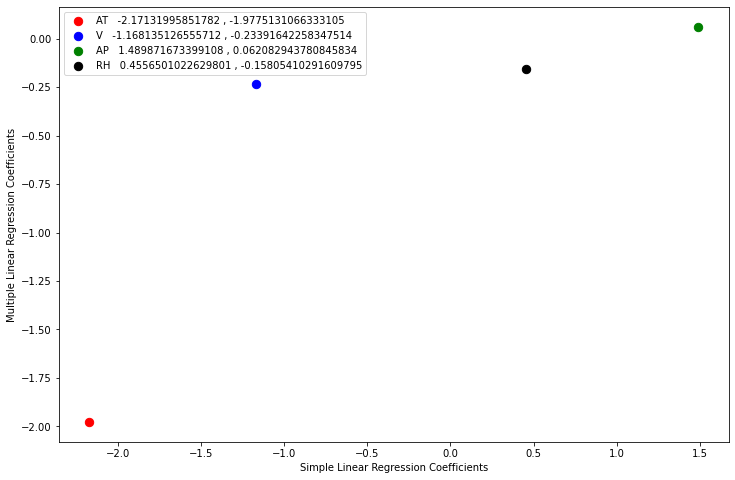

In [138]:
fig, axes = plt.subplots(figsize=(12, 8))
colors = {'AT':'red','V':'blue','AP':'green','RH':'black'}
for i,j in zip(simple_linear_regression_parameters,multiple_linear_regression_parameters):
    text =''
    text+=i+'   '+str(simple_linear_regression_parameters[i])+' , '+str(multiple_linear_regression_parameters[j])
    axes.scatter(simple_linear_regression_parameters[i], multiple_linear_regression_parameters[j],c=colors[i],s=70,label=text)
    plt.xlabel("Simple Linear Regression Coefficients")
    plt.ylabel("Multiple Linear Regression Coefficients")
axes.legend()
plt.show()
    

In [139]:
print(simple_linear_regression_parameters)
print(multiple_linear_regression_parameters)


{'AT': -2.17131995851782, 'V': -1.168135126555712, 'AP': 1.489871673399108, 'RH': 0.4556501022629801}
{'AT': -1.9775131066333105, 'V': -0.23391642258347514, 'AP': 0.062082943780845834, 'RH': -0.15805410291609795}


From the above cell, we can observe that there is not much difference in the coefficient of AT(temperature, indicating that the temperature is the most important predictor) whereas there is a significant difference in the coefficients of V, AP, and RH. The coefficient of RH has a positive sign in the simple linear regression estimate but it has a negative sign in the multiple linear regression.

## *Question 1.f) Is there evidence of nonlinear association between any of the predictors and the response?*

To identify whether there is a non-linear association between any of the predictors and the response, let us take each of the predictors one by one and generate a non-linear function with them and get the p-values. If the p-values are small, we can reject the null hypothesis which says the predictor does not affect the response.  Hence, the feature or predictor is a meaningful addition to our model and thus there is evidence of nonlinear association.


For example: Let us say we take the predictor AT and we have given a degree =3.

The polynomial regression will look like: y = x0+ x1.AT+ X2.AT^2+ X3.AT^3 and we predict the coefficents for each degree or power.

In [140]:
new_train_x_AT,new_train_x_V,new_train_x_AP,new_train_x_RH = np.expand_dims(train_x_AT, axis=1),np.expand_dims(train_x_V, axis=1),np.expand_dims(train_x_AP, axis=1),np.expand_dims(train_x_RH, axis=1)

In [141]:
# Ploynomial Regression Function.

def polynomial_regression(train_x,train_y):
    poly = PolynomialFeatures(3)
    train_x_polynomial = poly.fit_transform(train_x)
    model = sm.OLS(train_y,train_x_polynomial)
    results = model.fit()
    print(results.summary())
    return results

## *Non Linear association between AT and PE*

In [142]:
results = polynomial_regression(new_train_x_AT,train_y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:00   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

We know that the P-value tests the null hypothesis that the coefficient is equal to 0(no effect). A low p-value suggests that we can reject the null hypothesis. 

Here, the p-value =0 for all the degrees of X (we can see from the summary). Hence, the feature or predictor (AT) is a meaningful addition to our model. 

This indicates that there is a nonlinear association between predictor (AT) and response variable (PE).

## *Non Linear association between V and PE*

In [143]:
results = polynomial_regression(new_train_x_V,train_y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:00   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

We know that the P-value tests the null hypothesis that the coefficient is equal to 0(no effect).

Here we can observe that X^2 has a higher p-value, thus we can't reject the null hypothesis of x^2.
X^3 also has a non-zero p-value. 

If we kept our p-value to be very low(say <0.0001) then, there is no nonlinear association between the predictor (V) and the response variable (PE).



## *Non Linear association between AP and PE*

In [144]:
results = polynomial_regression(new_train_x_AP,train_y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:00   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

We know that the P-value tests the null hypothesis that the coefficient is equal to 0(no effect). A low p-value suggests that we can reject the null hypothesis. 

Here, the p-value =0 for all the degrees of X (we can see from the summary). Hence, the feature or predictor (AP) is a meaningful addition to our model. 

This indicates that there is a nonlinear association between predictor (AP) and response variable (PE).

## *Non Linear association between RH and PE*

In [145]:
results = polynomial_regression(new_train_x_RH,train_y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:01   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

We know that the P-value tests the null hypothesis that the coefficient is equal to 0(no effect). A low p-value suggests that we can reject the null hypothesis. 

Here, the p-value =0 for all the degrees of X (we can see from the summary). Hence, the feature or predictor (RH) is a meaningful addition to our model. 

This indicates that there is a nonlinear association between predictor (RH) and response variable (PE).

## *Question 1.g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.*

In [146]:
def feature_interactions_linear_regression():
    model = smf.ols(formula = 'PE~AT+V+AP+RH+AT*V+AP*RH+V*RH+AT*AP+V*AP+AT*RH', data = df)
    results = model.fit()
    print(results.summary())

feature_interactions_linear_regression()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:01   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

From the summary we can observe the following:

1. The predictors V,(AT * V),(V * AP),(AT * RH) are having p-values = 0 and they are statistically significant.Hence,the feature or predictor is a meaningful addition to our model.

2. The predictor (AT * AP) is having a very high p-value, hence it can't reject the null hypothesis. This feature can't be really significant to our model.

3. If our threshold for p-value is 0.05 then 𝐴𝑃,𝑅𝐻 and (𝐴𝑃 * 𝑅𝐻) can be statistically significant(but it is completely dependent on the threshold which we set for the p-value).

4. If our threshold for p-value is 0.10 or 0.15 then AT and (V * 𝑅𝐻) can be statistically significant(but it is completely dependent on the threshold which we set for the p-value).

5. Here, we have set the threshold of the p-value to be equal to 0.05.


## *Question 1.h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.*

In [147]:
# Getting the train test split of the data.
def get_train_test_split_data(df):
    n = len(df)
    train_data_size = math.ceil(n*0.7)
    #print(train_data_size) #6698
    temp = [_ for _ in range(n)]
    random.shuffle(temp)
    
    return df.iloc[temp[:train_data_size],:],df.iloc[temp[:train_data_size],:-1],df.iloc[temp[:train_data_size],-1],df.iloc[temp[train_data_size:],:-1],df.iloc[temp[train_data_size:],-1]
    


In [148]:
train_split_data,train_x_split,train_y_split,test_x_split,test_y_split = get_train_test_split_data(df)

In [149]:
# check whether the split has been correctly done.

mean_square_error = {}
print(len(train_x_split))
print(len(train_y_split))
print(len(test_x_split))
print(len(test_y_split))

6698
6698
2870
2870


1. We have shuffled the data and we are fixing the random seed because our model will fit the data differently for different training sets.

2. The randomly selected dataset will be the same for all the experiments and model fitting since we have set the random seed at the beginning of the notebook.

## *Linear Regression with all the predictors*

In [150]:
def Linear_regression_with_all_the_predictors(train_split_data):
    model = smf.ols(formula = 'PE~AT+V+AP+RH', data = train_split_data)
    results = model.fit()
    print(results.summary())
    return results

In [151]:
def predict_train_test_errors(train_x_split,train_y_split,test_x_split,test_y_split,results):
    predictions_of_train_y = results.predict(train_x_split)
    predictions_of_test_y = results.predict(test_x_split)
    train_mse = mean_squared_error(train_y_split, predictions_of_train_y)
    test_mse = mean_squared_error(test_y_split, predictions_of_test_y)
    
    print("\n\nThe Training MSE :",train_mse)
    print("The Testing MSE :",test_mse)
    return train_mse,test_mse
    

In [152]:
results = Linear_regression_with_all_the_predictors(train_split_data)
train_mse,test_mse = predict_train_test_errors(train_x_split,train_y_split,test_x_split,test_y_split,results)
mean_square_error["LR_all_predictors"] = [train_mse, test_mse]


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.185e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:01   Log-Likelihood:                -19668.
No. Observations:                6698   AIC:                         3.935e+04
Df Residuals:                    6693   BIC:                         3.938e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    459.1447     11.583     39.640      0.0

Hence, we can observe that the training MSE is 20.800979833596976 and the testing MSE is 20.697347626082408 when we have used all the predictors for the model.  

Note: The training MSE and Testing MSE is subject to change when you are running the notebook multiple times(but they are expected to remain close to the value specified by in this cell).

## *Linear Regression with all possible interaction terms and quadratic nonlinearities*

In [153]:
def Linear_regression_with_all_possible_interactions_quadratic(train_split_data):
    model = smf.ols(formula = 'PE~AT+V+AP+RH+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH+np.power(AT,2)+np.power(V,2)+np.power(AP,2)+np.power(RH,2)', data = train_split_data)
    results = model.fit()
    print(results.summary())
    return results

In [154]:
results = Linear_regression_with_all_possible_interactions_quadratic(train_split_data)
train_mse,test_mse = predict_train_test_errors(train_x_split,train_y_split,test_x_split,test_y_split,results)
mean_square_error["LR_all_possible_terms_and_quadratic"] = [train_mse, test_mse]

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7221.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:01   Log-Likelihood:                -19208.
No. Observations:                6698   AIC:                         3.845e+04
Df Residuals:                    6683   BIC:                         3.855e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7767.3621   1410.775     

By observing the summary shown above, we can reject the null hypothesis of AP, RH, AT^2, AP^2, RH^2 since they have the p-value = 0.
If we set the threshold of the p-value to be 0.05, then we can also reject the null hypothesis of (AT * V), (AT * RH),(AP * RH).
We will also include the predictors AT and V (eventhough their p-value is more) because, without them we can't calculate (AT * V) and (AT * RH).

## *Linear Regression after removing insignificant terms*

In [155]:
def Linear_regression_modified(train_split_data):
    model = smf.ols(formula = 'PE~AT+V+AP+RH+AT*V+AT*RH+AP*RH+np.power(AT,2)+np.power(AP,2)+np.power(RH,2)', data = train_split_data)
    results = model.fit()
    print(results.summary())
    return results

In [156]:
results = Linear_regression_modified(train_split_data)
train_mse,test_mse = predict_train_test_errors(train_x_split,train_y_split,test_x_split,test_y_split,results)
mean_square_error["LR_after_removing_insignificant_terms"] = [train_mse, test_mse]

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.009e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:40:01   Log-Likelihood:                -19215.
No. Observations:                6698   AIC:                         3.845e+04
Df Residuals:                    6687   BIC:                         3.853e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.04e+04   1073.835     

We can clearly see, how our model accuracy has improved when we introduced non-linearity and also interacting predictors into the model. After carefully picking the required predictors based on the p-values, our accuracy has further improved.

Before:

<br> The Training MSE : 20.65327535442791   
<br> The Testing MSE : 21.056331465042806    

After carefully picking the required predictors based on the p-values:

<br> The Training MSE : 18.16522335087736
<br> The Testing MSE : 18.102032647020735

Note: The training MSE and Testing MSE is subject to change when you are running the notebook multiple times(but they are expected to remain close to the value specified by in this cell).


## *Question 1.i)  KNN Regression:*

## *Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k .*

In [157]:
def Knn_Regression(train_x_split,train_y_split,k):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x_split, train_y_split)
    return knn

In [158]:
def predict_train_test_errors(train_x_split,train_y_split,test_x_split,test_y_split,knn):
    predictions_of_train_y = knn.predict(train_x_split)
    predictions_of_test_y = knn.predict(test_x_split)
    train_mse = mean_squared_error(train_y_split, predictions_of_train_y)
    test_mse = mean_squared_error(test_y_split, predictions_of_test_y)
    #print("\n\nThe Training MSE :",train_mse)
    #print("The Testing MSE :",test_mse)
    return train_mse,test_mse
    
    

### *Knn regression for Raw Data* 

In [159]:
min_test_error,train_error_,min_k = float('inf'),-1,-1
raw_train_errors,raw_test_errors = [],[]
for k in range(1,101):
    knn = Knn_Regression(train_x_split,train_y_split,k)
    train_mse,test_mse = predict_train_test_errors(train_x_split,train_y_split,test_x_split,test_y_split,knn)
    raw_train_errors.append(train_mse)
    raw_test_errors.append(test_mse)
    if test_mse < min_test_error:
        min_test_error = test_mse
        min_k = k
        train_error = train_mse
print("The K value that gives the best fit with raw data is :",min_k," with test error =",min_test_error, "and train error =",train_error)
mean_square_error["Knn_Regression_using_raw_data"] = [train_error, min_test_error]

The K value that gives the best fit with raw data is : 6  with test error = 16.34063892082849 and train error = 11.142873935834912


In [160]:
mean_square_error

{'LR_all_predictors': [20.800979833596976, 20.697347626082408],
 'LR_all_possible_terms_and_quadratic': [18.12912534259745,
  18.060483919027067],
 'LR_after_removing_insignificant_terms': [18.16522335087736,
  18.102032647020735],
 'Knn_Regression_using_raw_data': [11.142873935834912, 16.34063892082849]}

### *Plot the train and test errors in terms of 1/k for raw data*

In [161]:
one_by_k = [1/k for k in range(1,101)]

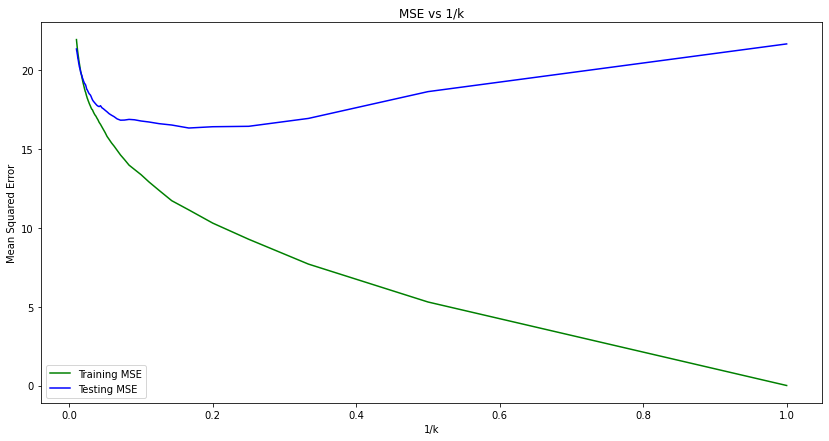

In [162]:
fig, axes = plt.subplots(figsize=(14, 7))
axes.plot(one_by_k, raw_train_errors,c='green', label="Training MSE")
axes.plot(one_by_k, raw_test_errors,c='blue',label="Testing MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("Mean Squared Error")
axes.legend()
axes.set_title("MSE vs 1/k")
plt.show()


We can observe from the graph as the number of neighbors keeps decreasing, we are overfitting the training data (training error decreases) and our test error keeps on increasing.

### *Knn regression for Normalized Data*

In [163]:
min_test_error,train_error_,min_k = float('inf'),-1,-1
norm_train_errors,norm_test_errors = [],[]
norm_train_x_split,norm_test_x_split = normalize(train_x_split),normalize(test_x_split)

for k in range(1,101):
    knn = Knn_Regression(norm_train_x_split,train_y_split,k)
    train_mse,test_mse = predict_train_test_errors(norm_train_x_split,train_y_split,norm_test_x_split,test_y_split,knn)
    norm_train_errors.append(train_mse)
    norm_test_errors.append(test_mse)
    if test_mse < min_test_error:
        min_test_error = test_mse
        min_k = k
        train_error = train_mse
print("The K value that gives the best fit with normalized data is :",min_k," with test error =",min_test_error, "and train error =",train_error)
mean_square_error["Knn_Regression_using_normalized_data"] = [train_error, min_test_error]

The K value that gives the best fit with normalized data is : 15  with test error = 18.13099570468448 and train error = 15.518067117481184


### *Plot the train and test errors in terms of 1/k for normalized data*

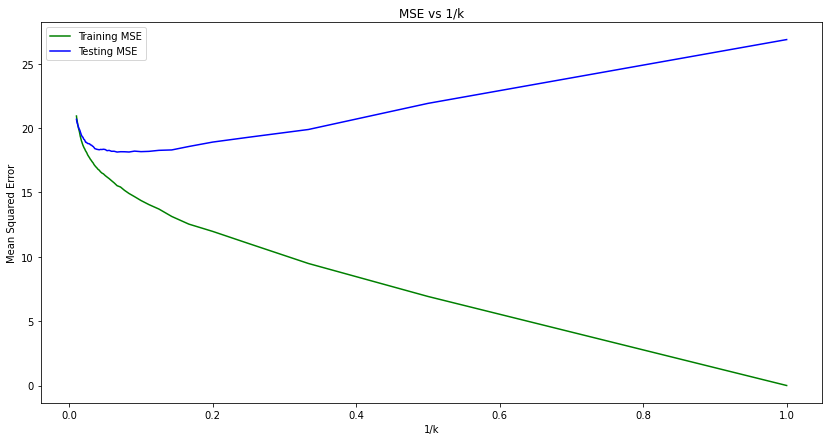

In [164]:
fig, axes = plt.subplots(figsize=(14, 7))
axes.plot(one_by_k, norm_train_errors,c='green', label="Training MSE")
axes.plot(one_by_k, norm_test_errors,c='blue',label="Testing MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("Mean Squared Error")
axes.legend()
axes.set_title("MSE vs 1/k")
plt.show()

We can observe from the graph as the number of neighbors keeps decreasing, we are overfitting the training data (training error decreases) and our test error keeps on increasing.

We can also infer that not always the test error reduces when we perform normalizing. Here, the minimum test error has increased when we normalized the data.

## *Question 1.j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.*

In [165]:
summary_data_frame = pd.DataFrame(mean_square_error, index=["train_error", "test_error"])

summary_data_frame

,LR_all_predictors,LR_all_possible_terms_and_quadratic,LR_after_removing_insignificant_terms,Knn_Regression_using_raw_data,Knn_Regression_using_normalized_data
train_error,20.800980,18.129125,18.165223,11.142874,15.518067
test_error,20.697348,18.060484,18.102033,16.340639,18.130996


1.) We can observe from the summary_data_frame that KNN regression using raw data has the lowest test error compared to linear regression. Hence, we can say that KNN regression performs best for our dataset.

2.) Even though there is the curse of dimensionality (if you have too many features finding the nearest neighbors becomes hard in the higher dimensional space), KNN seems to have worked better because the data might not be fully linearly separable data. If the data was linearly separable then our linear regression would have done better, but here KNN regression has done better.

## *Question 2) . ISLR: 2.4.1*

## *For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.*

## *(a) The sample size n is extremely large, and the number of predictors p is small.*

Solution: 

i.) A model is considered to be flexible if the model can provide a much wider range of possible shapes to estimate the function(f). It means that the model has to be complex. The inflexible model is relatively less complex than the flexible model but is highly interpretable and simple.

ii.) Now, when the number of predictors p is small and the sample size n is extremely large we should prefer a flexible model rather than an inflexible model because the inflexible model cannot completely capture the relationship between the predictors(X1, X2,..., Xp) and the response (Y). That is, it will underfit the model. Thus, we will go for a flexible model.

## *(b) The number of predictors p is extremely large, and the number of observations n is small.*

Solution:

i.) When the number of observations n is small and the number of predictors p is very large, then we shall go for an inflexible or less complex model because if we go for a flexible model, it might follow or memorize all the training data points (including noise) too closely. This results in a problem called 'Overfitting', hence, we can choose a simple inflexible model when the number of observations is small.


## *(c) The relationship between the predictors and response is highly non-linear.*

Solution:

i.) When the relationship between the predictors (X1, X2,..., Xp) and the response (Y) is highly non-linear it means that the true function(f) is a higher-order function and it is complex or flexible. The non-linear relationship between the predictors and the response can't be captured well by the simple inflexible model. Thus, we shall go for a flexible model.

## *(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.*

Solution:

i.) If the variance of the error term is extremely high, it suggests that there is a lot of noise in the data. So, if we choose a flexible model, there is a possibility of that model to follow or memorize the noise too closely and resulting in the problem known as, 'Overfitting'. Hence, we shall go for an inflexible or a simple model when the variance of the error terms is high.

## *Question 3) . ISLR: 2.4.7*

## *The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.*

obs = [[0,3,0,'Red'],
<br>    [2,0,0,'Red'],
<br>    [0,1,3,'Red'],
<br>    [0,1,2,'Green'],
<br>    [-1,0,1,'Green'],
<br>    [1,1,1,'Red']] 

## *(a) Compute the Euclidean distance between each observation and the test point,X1 = X2 =X3 =0.*

In [166]:
def euclidean(y):
    return math.sqrt((y[0]**2)+(y[1]**2)+(y[2]**2))


obs = [[0,3,0,'Red'],[2,0,0,'Red'],[0,1,3,'Red'],[0,1,2,'Green'],[-1,0,1,'Green'],[1,1,1,'Red']]

for i in obs:
    print("Euclidean Distance(test point, observation",i,") =",euclidean(i[:-1]))

Euclidean Distance(test point, observation [0, 3, 0, 'Red'] ) = 3.0
Euclidean Distance(test point, observation [2, 0, 0, 'Red'] ) = 2.0
Euclidean Distance(test point, observation [0, 1, 3, 'Red'] ) = 3.1622776601683795
Euclidean Distance(test point, observation [0, 1, 2, 'Green'] ) = 2.23606797749979
Euclidean Distance(test point, observation [-1, 0, 1, 'Green'] ) = 1.4142135623730951
Euclidean Distance(test point, observation [1, 1, 1, 'Red'] ) = 1.7320508075688772


## *(b) What is our prediction with K = 1? Why?*

Solution:

i.) When K=1, our prediction will be Green because the closest neighbor to our test point is observation 5 [-1, 0, 1, 'Green'].

## *(c) What is our prediction with K = 3? Why?*

Solution:

i.) When K=3, the three nearest neighbors would be observation 2 (Red), observation 5 (Green), and observation 6 (Red).

By majority polling, the probability of the test point belonging to Red = 2/3 and the probability of the test point belonging to Green = 1/3. Hence, our prediction will be Red.


## *(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?*

Solution:

i.) When the Bayes decision boundary is highly non-linear we can go for smaller values of K because the larger values of K will lead to a linear decision boundary. Since large K values lookout for a lot of data points, the boundary will be almost linear rather than non-linear. Hence, we can go for smaller values of K.